## **AIVLE School 미니프로젝트 8기 AI트랙 1차** ##
## **공공데이터를 활용한 <span style="color:skyblue">미세먼지 농도</span> 예측**
---
## [step 1,2] 데이터 분석 및 전처리

## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요?
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여, 미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여 미세먼지 농도를 예측하는 머신러닝 모델 구현

### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2024.csv : 2024년 미세먼지 데이터
    * weather_2024.csv : 2024년 날씨 데이터
* 테스트 데이터
    * air_2025.csv : 2025년 미세먼지 데이터
    * weather_2025.csv : 2025년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_202x)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 프로젝트 폴더를 준비하고 데이터를 로딩하시오.
        * 구글코랩
            * 구글 드라이브에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
        * (필요시) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 구글 코랩 (또는 필요시 로컬)를 사용하시면 됩니다.

#### 1) 구글 코랩 수행

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/project1/'

#### 2) (희망시) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = './data/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [2]:
# 필요한 라이브러리 설치 및 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.




> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
<small>(해결되지 않는다면 아래 Colab 한글 깨짐 현상 해결법 참고)<br>https://developnote.tistory.com/165#google_vignette </small>

In [3]:
# (Jupyter) 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [ ]:
# (Colab) 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
!apt -qq -y install fonts-nanum > /dev/null
!rm -rf ~/.cache/matplotlib

import matplotlib as mpl
import matplotlib.font_manager as fm
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

### (3) 데이터 불러오기
* Pandas 라이브러리를 활용해서 'air_2024.csv'파일을 'air_24' 변수에,'air_2025.csv'파일을 'air_25' 변수에 저장하고 그 데이터를 확인하세요.
 ( 구분자/인코딩 sep = ',',encoder = 'cp949')

* Pandas 라이브러리를 활용해서 'weather_2024.csv'파일을 'weather_24' 변수에,'weather_2025.csv'파일을 'weather_25' 변수에 저장하고 그 데이터를 확인하세요.
 ( 구분자/인코딩 sep = ',',encoder = 'cp949')

#### 1) 데이터로딩

In [38]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 데이터 로딩
air_24 = pd.read_csv(path + 'air_2024.csv', encoding='cp949')
air_25 = pd.read_csv(path + 'air_2025.csv', encoding='cp949')

weather_24 = pd.read_csv(path + 'weather_2024.csv', encoding='cp949')
weather_25 = pd.read_csv(path + 'weather_2025.csv', encoding='cp949')

#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(air_24.head())
display(air_24.tail())
display(air_24.describe())
display(air_24.info())

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2024010101,0.0031,1.21,0.0022,0.0425,29.0,23.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2024010102,0.0032,1.16,0.0020,0.0393,24.0,21.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2024010103,0.0030,1.00,0.0022,0.0359,23.0,19.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2024010104,0.0029,0.98,0.0021,0.0355,23.0,18.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2024010105,0.0031,1.02,0.0020,0.0371,25.0,21.0,서울 종로구 종로35가길 19


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
8779,서울 종로구,도시대기,111123,종로구,2024123120,0.0027,0.36,0.0284,0.0166,25.0,14.0,서울 종로구 종로35가길 19
8780,서울 종로구,도시대기,111123,종로구,2024123121,0.0026,0.36,0.0257,0.0187,23.0,12.0,서울 종로구 종로35가길 19
8781,서울 종로구,도시대기,111123,종로구,2024123122,0.0026,0.40,0.0204,0.0238,19.0,12.0,서울 종로구 종로35가길 19
8782,서울 종로구,도시대기,111123,종로구,2024123123,0.0023,0.48,0.0135,0.0314,21.0,13.0,서울 종로구 종로35가길 19
8783,서울 종로구,도시대기,111123,종로구,2024123124,0.0024,0.56,0.0067,0.0403,22.0,11.0,서울 종로구 종로35가길 19


,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,8784.0,8.784000e+03,8591.000000,8684.000000,8661.000000,8665.000000,8649.000000,8658.000000
mean,111123.0,2.024067e+09,0.002956,0.412198,0.034355,0.019635,30.660308,18.975629
std,0.0,3.453123e+04,0.000670,0.169987,0.021484,0.013290,24.811649,13.612901
min,111123.0,2.024010e+09,0.001500,0.100000,0.001300,0.002800,3.000000,1.000000
25%,111123.0,2.024040e+09,0.002500,0.300000,0.020400,0.010500,17.000000,10.000000
50%,111123.0,2.024070e+09,0.002800,0.370000,0.031500,0.015800,26.000000,16.000000
75%,111123.0,2.024100e+09,0.003300,0.480000,0.044600,0.024300,38.000000,25.000000
max,111123.0,2.024123e+09,0.007600,1.560000,0.177300,0.106400,442.000000,96.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8784 non-null   object 
 1   망       8784 non-null   object 
 2   측정소코드   8784 non-null   int64  
 3   측정소명    8784 non-null   object 
 4   측정일시    8784 non-null   int64  
 5   SO2     8591 non-null   float64
 6   CO      8684 non-null   float64
 7   O3      8661 non-null   float64
 8   NO2     8665 non-null   float64
 9   PM10    8649 non-null   float64
 10  PM25    8658 non-null   float64
 11  주소      8784 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 823.6+ KB


None

In [40]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(air_25.head())
display(air_25.tail())
display(air_25.describe())
display(air_25.info())

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2025010101,0.0026,0.68,0.0045,0.0425,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2025010102,0.0023,0.73,0.0034,0.0457,24.0,11.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2025010103,0.0025,0.77,0.0032,0.0478,23.0,13.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2025010104,0.0028,0.76,0.0036,0.0458,31.0,17.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2025010105,0.0029,0.72,0.0035,0.0460,31.0,16.0,서울 종로구 종로35가길 19


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
2875,서울 종로구,도시대기,111123,종로구,2025043020,0.0031,0.39,0.0591,0.0225,45.0,20.0,서울 종로구 종로35가길 19
2876,서울 종로구,도시대기,111123,종로구,2025043021,0.0030,0.50,0.0553,0.0273,45.0,23.0,서울 종로구 종로35가길 19
2877,서울 종로구,도시대기,111123,종로구,2025043022,0.0034,0.36,0.0701,0.0164,45.0,23.0,서울 종로구 종로35가길 19
2878,서울 종로구,도시대기,111123,종로구,2025043023,0.0037,0.41,0.0696,0.0165,39.0,18.0,서울 종로구 종로35가길 19
2879,서울 종로구,도시대기,111123,종로구,2025043024,0.0040,0.52,0.0530,0.0277,41.0,25.0,서울 종로구 종로35가길 19


,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,2880.0,2.880000e+03,2855.000000,2855.000000,2855.000000,2855.000000,2853.000000,2848.000000
mean,111123.0,2.025027e+09,0.002730,0.468186,0.033284,0.023588,45.134946,27.939256
std,0.0,1.128904e+04,0.000736,0.187644,0.018110,0.014659,27.478036,18.991989
min,111123.0,2.025010e+09,0.001300,0.210000,0.001500,0.004800,3.000000,1.000000
25%,111123.0,2.025013e+09,0.002200,0.340000,0.020850,0.012100,26.000000,14.000000
50%,111123.0,2.025030e+09,0.002600,0.410000,0.034000,0.018800,40.000000,23.000000
75%,111123.0,2.025035e+09,0.003200,0.560000,0.044350,0.031700,57.000000,36.000000
max,111123.0,2.025043e+09,0.007600,1.750000,0.090200,0.082700,271.000000,129.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2880 non-null   object 
 1   망       2880 non-null   object 
 2   측정소코드   2880 non-null   int64  
 3   측정소명    2880 non-null   object 
 4   측정일시    2880 non-null   int64  
 5   SO2     2855 non-null   float64
 6   CO      2855 non-null   float64
 7   O3      2855 non-null   float64
 8   NO2     2855 non-null   float64
 9   PM10    2853 non-null   float64
 10  PM25    2848 non-null   float64
 11  주소      2880 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 270.1+ KB


None

In [41]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(weather_24.head())
display(weather_24.tail())
display(weather_24.describe())
display(weather_24.info())

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2024-01-01 0:00,0.6,NaN,NaN,9.0,1.9,NaN,20.0,...,NaN,394,NaN,19.0,-0.2,NaN,-0.1,-0.2,0.0,1.0
1,108,서울,2024-01-01 1:00,0.5,NaN,NaN,NaN,2.2,NaN,50.0,...,NaN,402,NaN,19.0,-0.2,NaN,-0.1,-0.2,0.0,1.0
2,108,서울,2024-01-01 2:00,0.4,NaN,NaN,NaN,0.4,NaN,0.0,...,13.0,616,NaN,19.0,-0.3,NaN,-0.1,-0.2,0.0,1.0
3,108,서울,2024-01-01 3:00,-0.1,NaN,NaN,NaN,1.7,NaN,20.0,...,13.0,265,NaN,19.0,-0.3,NaN,-0.1,-0.2,0.0,1.0
4,108,서울,2024-01-01 4:00,-0.2,NaN,NaN,NaN,2.2,NaN,20.0,...,14.0,203,NaN,19.0,-0.3,NaN,-0.1,-0.2,0.0,1.0


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8779,108,서울,2024-12-31 19:00,0.5,NaN,NaN,9.0,1.9,NaN,270.0,...,NaN,3760,NaN,NaN,-0.6,NaN,-0.2,-0.3,0.9,1.7
8780,108,서울,2024-12-31 20:00,0.0,NaN,NaN,9.0,2.4,NaN,250.0,...,NaN,3645,NaN,NaN,-0.9,NaN,-0.4,-0.3,0.9,1.7
8781,108,서울,2024-12-31 21:00,-0.7,NaN,NaN,9.0,1.0,NaN,270.0,...,NaN,3794,NaN,NaN,-1.3,NaN,-0.3,-0.3,0.9,1.7
8782,108,서울,2024-12-31 22:00,-1.0,NaN,NaN,9.0,0.7,NaN,320.0,...,NaN,3779,NaN,NaN,-1.9,NaN,-0.3,-0.3,0.9,1.7
8783,108,서울,2024-12-31 23:00,-1.4,NaN,NaN,9.0,1.3,NaN,250.0,...,NaN,3412,NaN,NaN,-2.6,NaN,-0.3,-0.3,0.9,1.7


,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,8784.0,8784.000000,0.0,956.000000,1732.0,8753.000000,13.0,8753.000000,13.0,8784.000000,...,4474.000000,8784.000000,0.0,2.403000e+03,8784.000000,14.0,8784.000000,8784.000000,8784.000000,8784.000000
mean,108.0,14.869331,NaN,1.371757,9.0,2.313150,9.0,177.166686,9.0,65.812045,...,14.318730,2326.851434,NaN,4.656389e+04,15.877630,0.0,14.839982,15.002482,14.773816,15.008322
std,0.0,10.903428,NaN,3.330638,0.0,1.129083,0.0,106.848304,0.0,17.543280,...,12.814185,1204.915094,NaN,1.278100e+06,13.397386,0.0,10.362239,10.573520,9.897558,9.514987
min,108.0,-14.000000,NaN,0.000000,9.0,0.000000,9.0,0.000000,9.0,14.000000,...,2.000000,24.000000,NaN,1.000000e+00,-8.400000,0.0,-2.400000,-1.700000,-0.500000,0.300000
25%,108.0,4.700000,NaN,0.000000,9.0,1.500000,9.0,50.000000,9.0,53.000000,...,7.000000,1357.000000,NaN,4.000000e+00,2.900000,0.0,4.300000,4.200000,4.700000,5.000000
50%,108.0,15.900000,NaN,0.100000,9.0,2.200000,9.0,200.000000,9.0,67.000000,...,10.000000,2290.000000,NaN,1.900000e+01,15.600000,0.0,16.500000,16.400000,16.200000,16.400000
75%,108.0,24.400000,NaN,1.100000,9.0,3.000000,9.0,270.000000,9.0,80.000000,...,15.000000,3220.250000,NaN,4.200000e+01,25.400000,0.0,24.500000,25.000000,24.200000,24.200000
max,108.0,36.300000,NaN,39.000000,9.0,7.500000,9.0,360.000000,9.0,100.000000,...,75.000000,5000.000000,NaN,4.219020e+07,61.200000,0.0,32.700000,32.500000,31.100000,29.700000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8784 non-null   int64  
 1   지점명            8784 non-null   object 
 2   일시             8784 non-null   object 
 3   기온(°C)         8784 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        956 non-null    float64
 6   강수량 QC플래그      1732 non-null   float64
 7   풍속(m/s)        8753 non-null   float64
 8   풍속 QC플래그       13 non-null     float64
 9   풍향(16방위)       8753 non-null   float64
 10  풍향 QC플래그       13 non-null     float64
 11  습도(%)          8784 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8784 non-null   float64
 14  이슬점온도(°C)      8784 non-null   float64
 15  현지기압(hPa)      8784 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8784 non-null   float64
 18  해면기압 QC플

None

In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(weather_25.head())
display(weather_25.tail())
display(weather_25.describe())
display(weather_25.info())

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2025-01-01 0:00,-1.2,NaN,NaN,9.0,0.7,NaN,290,...,NaN,3546,NaN,NaN,-3.0,NaN,-0.3,-0.3,0.9,1.7
1,108,서울,2025-01-01 1:00,-1.7,NaN,NaN,NaN,1.1,NaN,250,...,NaN,3274,NaN,NaN,-3.3,NaN,-0.3,-0.3,0.9,1.7
2,108,서울,2025-01-01 2:00,-1.8,NaN,NaN,NaN,0.5,NaN,340,...,NaN,3460,NaN,NaN,-3.5,NaN,-0.3,-0.3,0.9,1.7
3,108,서울,2025-01-01 3:00,-2.0,NaN,NaN,NaN,1.9,NaN,20,...,NaN,3256,NaN,NaN,-3.6,NaN,-0.3,-0.3,0.9,1.7
4,108,서울,2025-01-01 4:00,-2.3,NaN,NaN,NaN,2.2,NaN,20,...,NaN,3111,NaN,NaN,-3.7,NaN,-0.3,-0.3,0.9,1.7


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
3595,108,서울,2025-05-30 19:00,25.2,NaN,NaN,NaN,4.1,NaN,250,...,NaN,2330,NaN,NaN,24.8,NaN,25.3,23.7,19.9,17.9
3596,108,서울,2025-05-30 20:00,23.6,NaN,NaN,NaN,1.6,NaN,270,...,NaN,2115,NaN,NaN,21.5,NaN,24.5,23.1,19.9,17.9
3597,108,서울,2025-05-30 21:00,22.4,NaN,NaN,NaN,2.0,NaN,270,...,NaN,1936,NaN,NaN,19.7,NaN,23.7,22.5,20.0,18.0
3598,108,서울,2025-05-30 22:00,21.3,NaN,NaN,NaN,2.5,NaN,270,...,NaN,1850,NaN,NaN,18.7,NaN,23.0,21.8,20.0,18.2
3599,108,서울,2025-05-30 23:00,20.6,NaN,NaN,NaN,1.3,NaN,230,...,NaN,1745,NaN,NaN,17.7,NaN,22.5,21.3,20.0,18.3


,지점,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,습도(%),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
count,3600.0,3600.000000,0.0,340.000000,649.0,3600.000000,0.0,3600.000000,0.0,3600.000000,...,1495.000000,3600.000000,0.0,1.084000e+03,3600.000000,0.0,3600.000000,3600.000000,3600.000000,3600.000000
mean,108.0,7.537972,NaN,0.826765,9.0,2.510083,NaN,197.808333,NaN,60.103333,...,14.435452,2120.552500,NaN,2.367251e+04,8.194944,NaN,7.234694,6.744056,6.601917,6.605361
std,0.0,8.975582,NaN,1.581331,0.0,1.249238,NaN,100.498352,NaN,19.250961,...,13.834592,1212.132264,NaN,5.830631e+05,10.801505,NaN,8.041682,7.778889,6.896935,6.331297
min,108.0,-12.100000,NaN,0.000000,9.0,0.000000,NaN,0.000000,NaN,13.000000,...,1.000000,51.000000,NaN,1.000000e+00,-8.500000,NaN,-3.600000,-3.900000,-1.700000,-0.700000
25%,108.0,0.800000,NaN,0.000000,9.0,1.600000,NaN,70.000000,NaN,45.000000,...,6.000000,1123.750000,NaN,5.000000e+00,-0.400000,NaN,-0.400000,-0.600000,-0.300000,0.400000
50%,108.0,7.000000,NaN,0.150000,9.0,2.300000,NaN,250.000000,NaN,59.000000,...,10.000000,2033.500000,NaN,1.900000e+01,6.050000,NaN,6.500000,5.900000,6.200000,5.900000
75%,108.0,14.600000,NaN,0.900000,9.0,3.200000,NaN,270.000000,NaN,75.000000,...,16.000000,3057.250000,NaN,4.000000e+01,14.700000,NaN,14.100000,13.700000,13.500000,13.100000
max,108.0,30.300000,NaN,13.000000,9.0,8.400000,NaN,360.000000,NaN,98.000000,...,76.000000,5000.000000,NaN,1.916020e+07,46.700000,NaN,26.500000,25.400000,22.400000,20.800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             3600 non-null   int64  
 1   지점명            3600 non-null   object 
 2   일시             3600 non-null   object 
 3   기온(°C)         3600 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        340 non-null    float64
 6   강수량 QC플래그      649 non-null    float64
 7   풍속(m/s)        3600 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       3600 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          3600 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       3600 non-null   float64
 14  이슬점온도(°C)      3600 non-null   float64
 15  현지기압(hPa)      3600 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      3600 non-null   float64
 18  해면기압 QC플

None

## **2.EDA 1단계 - 데이터 기본 탐색 및 분석**

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 4 ~ 5개 변수를 뽑아 확인해보세요 </span>
    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        - 변수가 수치형인지, 범주형인지
        - 결측치 존재 여부 및 조치 방안
        - 기초 통계량 확인
        - 데이터 분포 확인
        - 변수가 내포하고 있는 의미 파악을 위한 추가 분석
        - 위 정보로부터 파악한 내용 정리


### (1) 변수1 : 측정일시

In [11]:
# 변수가 수치형인지, 범주형인지 확인해 보세요
print(f"air_24['측정일시']의 변수 타입: {air_24['측정일시'].dtype}")
print(f"air_25['측정일시']의 변수 타입: {air_25['측정일시'].dtype}")

air_24['측정일시']의 변수 타입: int64
air_25['측정일시']의 변수 타입: int64


In [12]:
# 결측치 존재 여부를 확인하고 조치 방안을 검토해 보세요
null_count1 = air_24['측정일시'].isnull().sum()
null_count2 = air_25['측정일시'].isnull().sum()

print(f"air_25['측정일시'] 결측치 존재 여부: {null_count1}개")
print(f"air_25['측정일시'] 결측치 존재 여부: {null_count2}개")

air_25['측정일시'] 결측치 존재 여부: 0개
air_25['측정일시'] 결측치 존재 여부: 0개


In [13]:
# 기초 통계량을 확인해 보세요
print("--- air_24['측정일시'] 기초 통계량 ---")
print(air_24['측정일시'].describe())
print("\n--- air_25['측정일시'] 기초 통계량 ---")
print(air_25['측정일시'].describe())

--- air_24['측정일시'] 기초 통계량 ---
count    8.784000e+03
mean     2.024067e+09
std      3.453123e+04
min      2.024010e+09
25%      2.024040e+09
50%      2.024070e+09
75%      2.024100e+09
max      2.024123e+09
Name: 측정일시, dtype: float64

--- air_25['측정일시'] 기초 통계량 ---
count    2.880000e+03
mean     2.025027e+09
std      1.128904e+04
min      2.025010e+09
25%      2.025013e+09
50%      2.025030e+09
75%      2.025035e+09
max      2.025043e+09
Name: 측정일시, dtype: float64


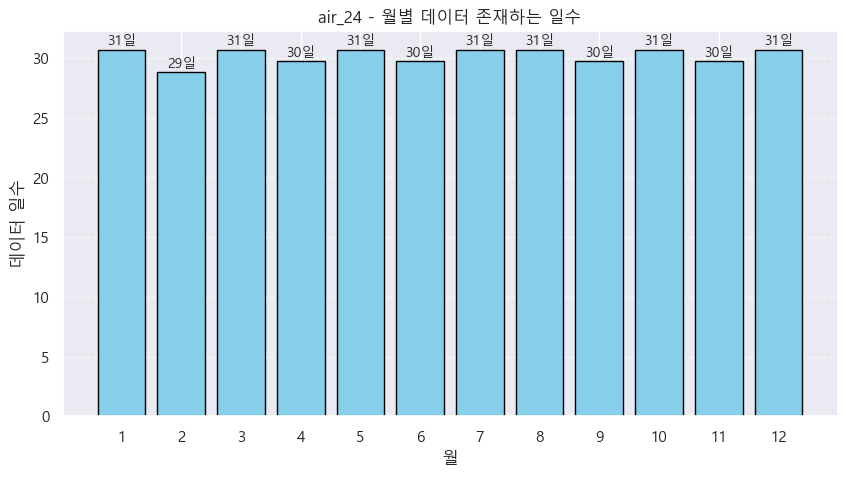

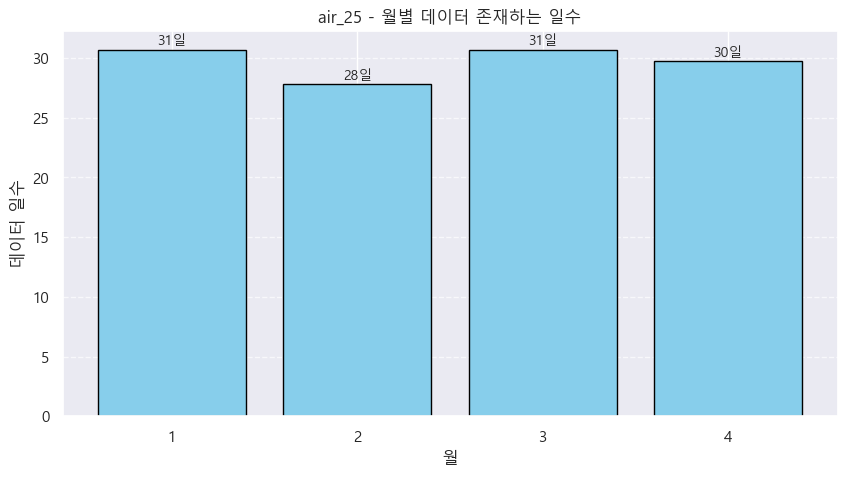

In [14]:
# 데이터 분포를 시각해 보세요
# '측정일시'를 datetime 형식으로 변환
air_24['측정일시'] = pd.to_datetime(air_24['측정일시'], format='%Y%m%d%H', errors='coerce')
air_25['측정일시'] = pd.to_datetime(air_25['측정일시'], format='%Y%m%d%H', errors='coerce')

def show_month_daily_avg_fixed(df, title):
    month_counts = df.groupby(df['측정일시'].dt.month).size()

    month_days = month_counts / 24 + 1

    plt.figure(figsize=(10,5))
    bars = plt.bar(month_days.index, month_days.values, color='skyblue', edgecolor='black')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.0f}일',
                 ha='center', va='bottom', fontsize=10)
    
    plt.title(f'{title} - 월별 데이터 존재하는 일수')
    plt.xlabel('월')
    plt.ylabel('데이터 일수')
    plt.xticks(month_days.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

show_month_daily_avg_fixed(air_24, 'air_24')
show_month_daily_avg_fixed(air_25, 'air_25')

In [40]:
# 변수가 내포하고 있는 의미 파악을 위한 추가 분석

# 데이터 기간 확인
print(f"air_24 데이터 기간: {air_24['측정일시'].min()} ~ {air_24['측정일시'].max()}")
print(f"시작일: {air_24['측정일시'].min()}")
print(f"종료일: {air_24['측정일시'].max()}")
print(f"총 기간(일): {int(air_24.shape[0]/24)}일")

print(f"\nair_25 데이터 기간: {air_25['측정일시'].min()} ~ {air_25['측정일시'].max()}")
print(f"시작일: {air_25['측정일시'].min()}")
print(f"종료일: {air_25['측정일시'].max()}")
print(f"총 기간(일): {int(air_25.shape[0]/24)}일")

air_24 데이터 기간: 2024010101 ~ 2024123124
시작일: 2024010101
종료일: 2024123124
총 기간(일): 366일

air_25 데이터 기간: 2025010101 ~ 2025043024
시작일: 2025010101
종료일: 2025043024
총 기간(일): 120일


In [ ]:
# 위 정보로부터 파악한 내용을 서술해 보세요

- 타입: int64 (정수형)
- 결측치: 없음
- 고유값: 중복 없음
- 의미: 측정 시점 기록
- 데이터 기간
  - air_24: 2024-01-01 01:00:00 ~ 2024-12-31 24:00:00 (총 366일, 윤년)
  - air_25: 2025-01-01 01:00:00 ~ 2025-04-30 24:00:00 (총 120일)
- 특이사항:
  1. datetime 형식으로 변환 필요
  2. weather 데이터와 달리 1 ~ 24시로 표기
  3. air_25의 경우 weather_25에 비해 30일 가량의 데이터가 부족

### (2) 변수2: 일시

In [9]:
# 변수가 수치형인지, 범주형인지 확인해 보세요
print(f"weather_24['일시']의 변수 타입: {weather_24['일시'].dtype}")
print(f"weather_25['일시']의 변수 타입: {weather_25['일시'].dtype}")

weather_24['일시']의 변수 타입: object
weather_25['일시']의 변수 타입: object


In [10]:
# 결측치 존재 여부를 확인하고 조치 방안을 검토해 보세요
null_count1 = weather_24['일시'].isnull().sum()
null_count2 = weather_25['일시'].isnull().sum()

print(f"weather_24['일시'] 결측치 존재 여부: {null_count1}개")
print(f"weather_25['일시'] 결측치 존재 여부: {null_count2}개")

weather_24['일시'] 결측치 존재 여부: 0개
weather_25['일시'] 결측치 존재 여부: 0개


In [11]:
# 기초 통계량을 확인해 보세요
print("--- weather_24['일시'] 기초 통계량 ---")
display(weather_24['일시'].describe())
print("\n--- weather_25['일시'] 기초 통계량 ---")
display(weather_25['일시'].describe())

--- weather_24['일시'] 기초 통계량 ---


count                8784
unique               8784
top       2024-01-01 0:00
freq                    1
Name: 일시, dtype: object


--- weather_25['일시'] 기초 통계량 ---


count                3600
unique               3600
top       2025-01-01 0:00
freq                    1
Name: 일시, dtype: object

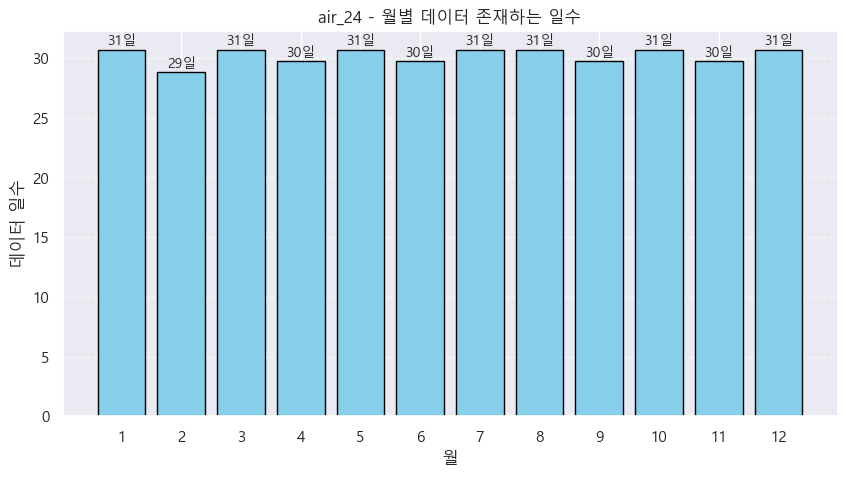

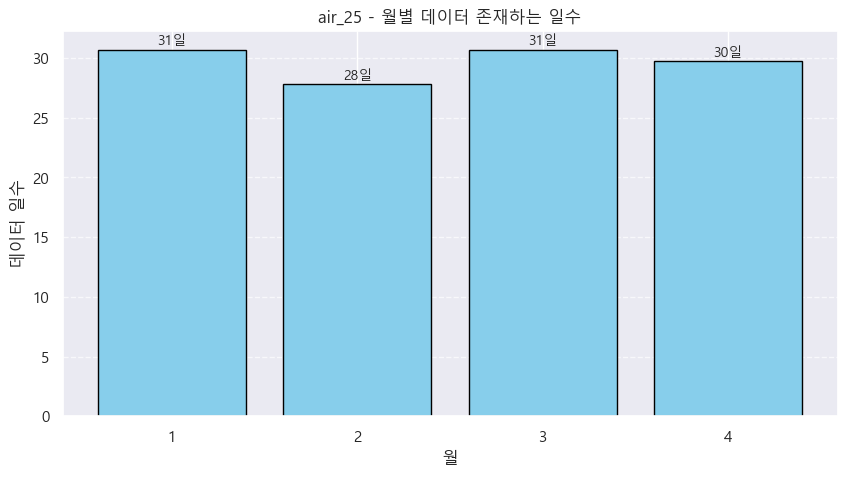

In [58]:
# 데이터 분포를 시각해 보세요
# '측정일시'를 datetime 형식으로 변환
weather_24['일시'] = pd.to_datetime(weather_24['일시'], errors='coerce')
weather_25['일시'] = pd.to_datetime(weather_25['일시'], errors='coerce')

# 데이터의 시간 분호 시각화 함수
def show_month_daily_avg_fixed(df, title):
    month_counts = df.groupby(df['측정일시'].dt.month).size()

    month_days = month_counts / 24 + 1

    plt.figure(figsize=(10,5))
    bars = plt.bar(month_days.index, month_days.values, color='skyblue', edgecolor='black')
    
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{height:.0f}일',
                 ha='center', va='bottom', fontsize=10)
    
    plt.title(f'{title} - 월별 데이터 존재하는 일수')
    plt.xlabel('월')
    plt.ylabel('데이터 일수')
    plt.xticks(month_days.index)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

show_month_daily_avg_fixed(air_24, 'air_24')
show_month_daily_avg_fixed(air_25, 'air_25')

In [ ]:
# 변수가 내포하고 있는 의미 파악을 위한 추가 분석
# 데이터 기간 확인
print(f"weather_24 데이터 기간: {weather_24['일시'].min()} ~ {weather_24['일시'].max()}")
print(f"시작일: {weather_24['일시'].min()}")
print(f"종료일: {weather_24['일시'].max()}")
print(f"총 기간(일): {int(weather_24.shape[0]/24)}일")

print(f"\nweather_25 데이터 기간: {weather_25['일시'].min()} ~ {weather_25['일시'].max()}")
print(f"시작일: {weather_25['일시'].min()}")
print(f"종료일: {weather_25['일시'].max()}")
print(f"총 기간(일): {int(weather_25.shape[0]/24)}일")


weather_24 데이터 기간: 2024-01-01 00:00:00 ~ 2024-12-31 23:00:00
시작일: 2024-01-01 00:00:00
종료일: 2024-12-31 23:00:00
총 기간(일): 366일

weather_25 데이터 기간: 2025-01-01 00:00:00 ~ 2025-05-30 23:00:00
시작일: 2025-01-01 00:00:00
종료일: 2025-05-30 23:00:00
총 기간(일): 150일


In [ ]:
# 위 정보로부터 파악한 내용을 서술해 보세요

- 타입: object (문자열)
- 결측치: 없음
- 고유값: 모든 행이 고유 → 중복 없음
- 의미: 측정 시점 기록
- 데이터 기간
  - weather_24: 2024-01-01 00:00:00 ~ 2024-12-31 23:00:00 (총 366일, 윤년)
  - weather_25: 2025-01-01 00:00:00 ~ 2025-05-30 23:00:00 (총 150일)
- 특이사항:
  1. datetime 형식으로 변환 필요
  2. air 데이터와 달리 0 ~ 23 표기법으로 수정 필요
  3. air_25에 비해 weather_25의 데이터가 30일 더 많음

### (3) 변수3: 풍속

In [45]:
# 변수가 수치형인지, 범주형인지 확인해 보세요
print(weather_24['풍속(m/s)'].dtype)

float64


In [48]:
weather_24.shape

(8784, 38)

In [ ]:
# 결측치 존재 여부를 확인하고 조치 방안을 검토해 보세요
print(weather_24['풍속(m/s)'].isna().sum())
print(weather_25['풍속(m/s)'].isna().sum())

# 8784개의 데이터중 31개의 데이터에 결측치가 존재
# 시간별로 평균 풍속의 차이가 크지 않다고 판단되여 앞뒤의 평균값을 사용해 결측치 제거
weather_24['풍속_diff'] = weather_24['풍속(m/s)'].diff()
display(weather_24['풍속_diff'].describe())

31
0


count    8750.000000
mean        0.000034
std         0.799859
min        -4.700000
25%        -0.500000
50%         0.000000
75%         0.500000
max         4.800000
Name: 풍속_diff, dtype: float64

In [50]:
# 기초 통계량을 확인해 보세요
weather_24['풍속(m/s)'].describe()

count    8753.000000
mean        2.313150
std         1.129083
min         0.000000
25%         1.500000
50%         2.200000
75%         3.000000
max         7.500000
Name: 풍속(m/s), dtype: float64

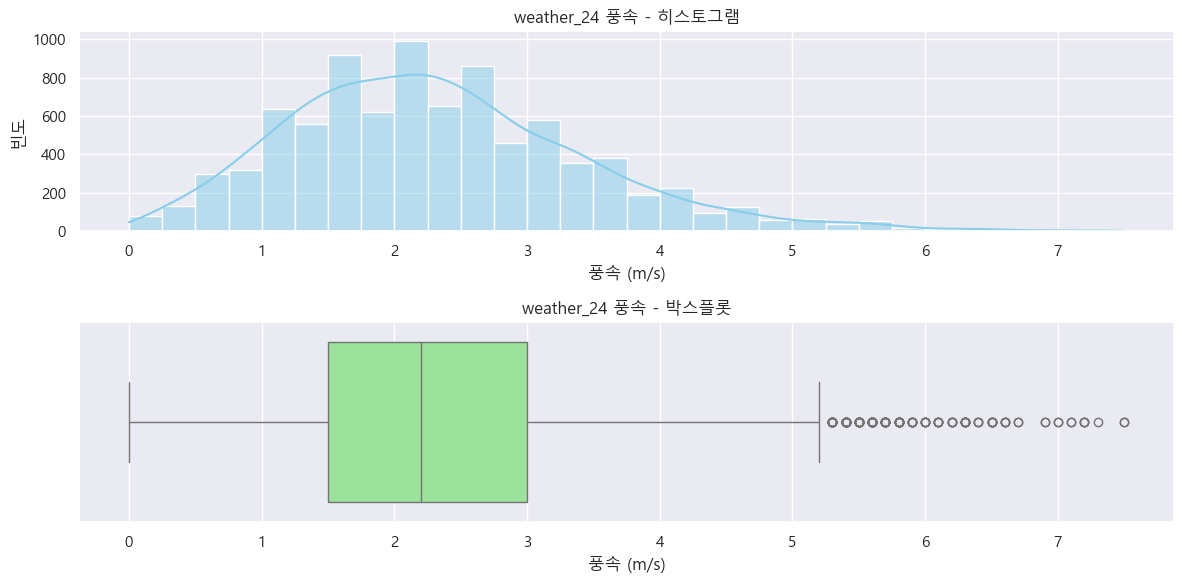

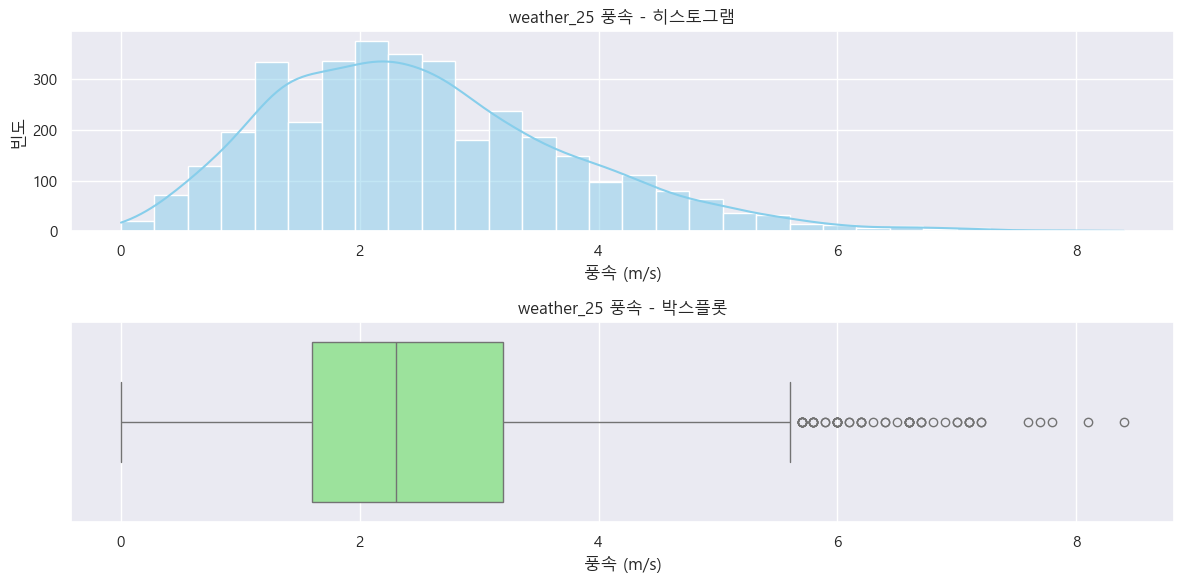

In [53]:
# 데이터 분포를 시각해 보세요
def plot_wind_distribution(df, title):
    plt.figure(figsize=(12,6))

    # 히스토그램
    plt.subplot(2,1,1)
    sns.histplot(df['풍속(m/s)'], bins=30, kde=True, color='skyblue')
    plt.title(f'{title} - 히스토그램')
    plt.xlabel('풍속 (m/s)')
    plt.ylabel('빈도')

    # 박스플롯
    plt.subplot(2,1,2)
    sns.boxplot(x=df['풍속(m/s)'], color='lightgreen')
    plt.title(f'{title} - 박스플롯')
    plt.xlabel('풍속 (m/s)')

    plt.tight_layout()
    plt.show()

plot_wind_distribution(weather_24, 'weather_24 풍속')
plot_wind_distribution(weather_25, 'weather_25 풍속')

PM10과 풍속 상관계수: -0.060


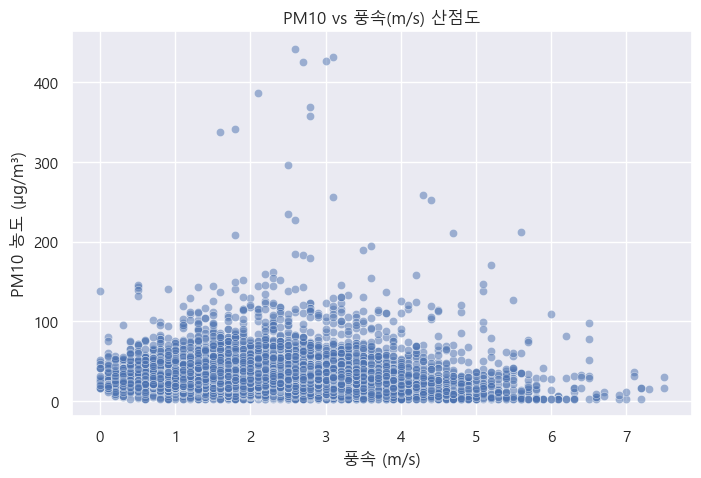

In [33]:
# 변수가 내포하고 있는 의미 파악을 위한 추가 분석
weather_24['time'] = pd.to_datetime(weather_24['일시'], errors='coerce')
air_24['time'] = pd.to_datetime(air_24['측정일시'] - 1, format='%Y%m%d%H', errors='coerce')

df_merge = air_24[['time', 'PM10']].merge(
    weather_24[['time', '풍속(m/s)']],
    on='time',
    how='inner'
)

# PM10을 한 시간 전으로 shift
df_merge['PM10_lag1'] = df_merge['PM10'].shift(1)

# NaN 제거
df_merge = df_merge.dropna(subset=['PM10_lag1'])

corr = df_merge['PM10_lag1'].corr(df_merge['풍속(m/s)'])

print(f"PM10과 풍속 상관계수: {corr:.3f}")

plt.figure(figsize=(8,5))
sns.scatterplot(x='풍속(m/s)', y='PM10', data=df_merge, alpha=0.5)
plt.title('PM10 vs 풍속(m/s) 산점도')
plt.xlabel('풍속 (m/s)')
plt.ylabel('PM10 농도 (µg/m³)')
plt.show()

In [ ]:
# 위 정보로부터 파악한 내용을 서술해 보세요

- 타입: float64 (실수형)
- 결측치: 31
- 의미: 시간별 풍속
- 특이사항:
  1. 풍속은 수치형 연속 변수이며, 대부분 낮은 값(1~3 m/s)에 분포
  2. 시간별 변화는 대체로 완만하나 극단적 순간 강풍 존재
  3. 결측치는 소량이며 풍속의 시간 사이의 풍속변화가 크지않아 선형 보간으로 처리 가능
  4. 상관계수가 0에 가까워 큰 관계가 보이지 않음

### (4) 변수4: 강수량

In [19]:
# 변수가 수치형인지, 범주형인지 확인해 보세요
print(weather_24['강수량(mm)'].dtype)
print(weather_25['강수량(mm)'].dtype)

float64
float64


In [32]:
# 결측치 존재 여부를 확인하고 조치 방안을 검토해 보세요
print(weather_24.shape, weather_24['강수량(mm)'].isna().sum())
print(weather_24.shape, weather_25['강수량(mm)'].isna().sum())

# 결측치가 많고 대부분은 0으로 추정

(8784, 39) 7828
(8784, 39) 3260


In [27]:
# 기초 통계량을 확인해 보세요
print(weather_24['강수량(mm)'].describe(), end='\n\n')
print(weather_25['강수량(mm)'].describe())

count    956.000000
mean       1.371757
std        3.330638
min        0.000000
25%        0.000000
50%        0.100000
75%        1.100000
max       39.000000
Name: 강수량(mm), dtype: float64

count    340.000000
mean       0.826765
std        1.581331
min        0.000000
25%        0.000000
50%        0.150000
75%        0.900000
max       13.000000
Name: 강수량(mm), dtype: float64


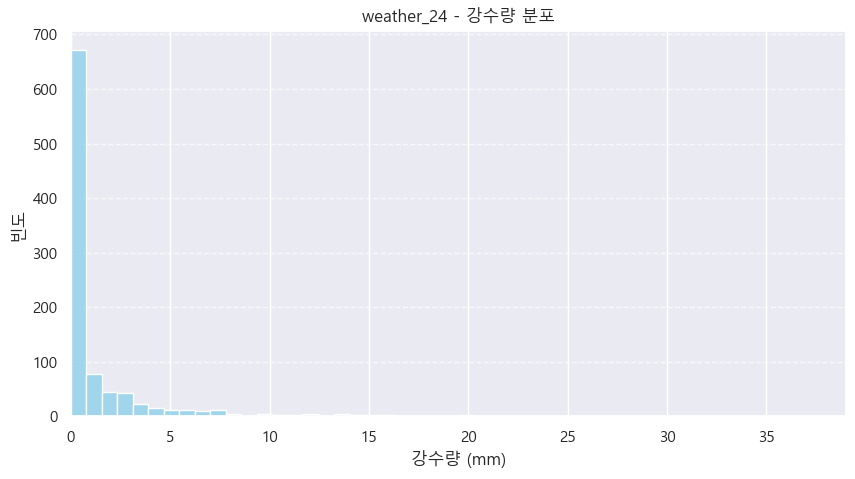

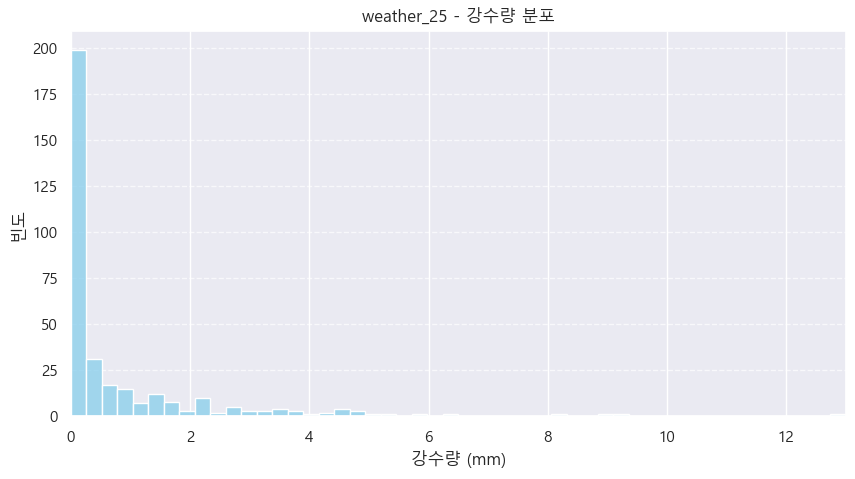

In [ ]:
# 데이터 분포를 시각해 보세요
def plot_precipitation_distribution(df, title):
    plt.figure(figsize=(10,5))
    # 히스토그램 그리기
    sns.histplot(df['강수량(mm)'], bins=50, kde=False, color='skyblue')
    
    plt.xlim(0, df['강수량(mm)'].max())
    plt.title(f'{title} - 강수량 분포')
    plt.xlabel('강수량 (mm)')
    plt.ylabel('빈도')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_precipitation_distribution(weather_24, 'weather_24')
plot_precipitation_distribution(weather_25, 'weather_25')

PM10과 강수량 상관계수: -0.129


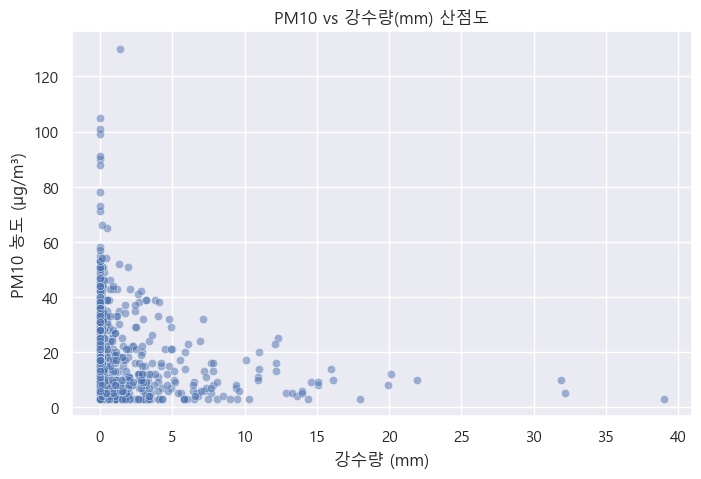

In [32]:
# 변수가 내포하고 있는 의미 파악을 위한 추가 분석
weather_24['time'] = pd.to_datetime(weather_24['일시'], errors='coerce')
air_24['time'] = pd.to_datetime(air_24['측정일시'] - 1, format='%Y%m%d%H', errors='coerce')

# PM10과 강수량 데이터 병합
df_merge_precip = air_24[['time', 'PM10']].merge(
    weather_24[['time', '강수량(mm)']],
    on='time',
    how='inner'
)

# PM10을 한 시간 전으로 shift
df_merge_precip['PM10_lag1'] = df_merge_precip['PM10'].shift(1)

# NaN 제거
df_merge_precip = df_merge_precip.dropna(subset=['PM10_lag1'])

# 상관계수 계산
corr_precip = df_merge_precip['PM10_lag1'].corr(df_merge_precip['강수량(mm)'])
print(f"PM10과 강수량 상관계수: {corr_precip:.3f}")

# 산점도 시각화
plt.figure(figsize=(8,5))
sns.scatterplot(x='강수량(mm)', y='PM10', data=df_merge_precip, alpha=0.5)
plt.title('PM10 vs 강수량(mm) 산점도')
plt.xlabel('강수량 (mm)')
plt.ylabel('PM10 농도 (µg/m³)')
plt.show()

In [ ]:
# 위 정보로부터 파악한 내용을 서술해 보세요

- 타입: float64 (실수형)
- 결측치: 24년도 7828, 25년도 3260
- 의미: 시간별 강수량(mm)
- 특이사항:
    1. 강수량은 수치형 연속 변수이며, 대부분 0mm에 분포
    2. 소량 데이터만 비0값을 가지며, 일부 극단적인 강수량 발생
    3. 결측치는 대부분 강수 없음으로 볼 수 있어 0으로 대체 가능하다고 보임

## **3.EDA 2단계 - 데이터 전처리**
- 진행한 개별 변수 분석에 맞추어 데이터를 전처리 하겠습니다.

### (1) air_24, air_25, weather_24, weather_25 데이터 전처리
* air_24, air_25 각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. [2-3]에서 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_24['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

#### **1) air_24, air_25 의 '측정일시'를 활용하여 'time' 변수 생성**

In [5]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
def make_time_air(df):
    df['time'] = pd.to_datetime(df['측정일시'] - 1, format='%Y%m%d%H', errors='coerce')
    return df

air_24 = make_time_air(air_24)
air_25 = make_time_air(air_25)

In [6]:
# 결과확인
display(air_24.head())
display(air_24.tail())

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
0,서울 종로구,도시대기,111123,종로구,2024010101,0.0031,1.21,0.0022,0.0425,29.0,23.0,서울 종로구 종로35가길 19,2024-01-01 00:00:00
1,서울 종로구,도시대기,111123,종로구,2024010102,0.0032,1.16,0.0020,0.0393,24.0,21.0,서울 종로구 종로35가길 19,2024-01-01 01:00:00
2,서울 종로구,도시대기,111123,종로구,2024010103,0.0030,1.00,0.0022,0.0359,23.0,19.0,서울 종로구 종로35가길 19,2024-01-01 02:00:00
3,서울 종로구,도시대기,111123,종로구,2024010104,0.0029,0.98,0.0021,0.0355,23.0,18.0,서울 종로구 종로35가길 19,2024-01-01 03:00:00
4,서울 종로구,도시대기,111123,종로구,2024010105,0.0031,1.02,0.0020,0.0371,25.0,21.0,서울 종로구 종로35가길 19,2024-01-01 04:00:00


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,time
8779,서울 종로구,도시대기,111123,종로구,2024123120,0.0027,0.36,0.0284,0.0166,25.0,14.0,서울 종로구 종로35가길 19,2024-12-31 19:00:00
8780,서울 종로구,도시대기,111123,종로구,2024123121,0.0026,0.36,0.0257,0.0187,23.0,12.0,서울 종로구 종로35가길 19,2024-12-31 20:00:00
8781,서울 종로구,도시대기,111123,종로구,2024123122,0.0026,0.40,0.0204,0.0238,19.0,12.0,서울 종로구 종로35가길 19,2024-12-31 21:00:00
8782,서울 종로구,도시대기,111123,종로구,2024123123,0.0023,0.48,0.0135,0.0314,21.0,13.0,서울 종로구 종로35가길 19,2024-12-31 22:00:00
8783,서울 종로구,도시대기,111123,종로구,2024123124,0.0024,0.56,0.0067,0.0403,22.0,11.0,서울 종로구 종로35가길 19,2024-12-31 23:00:00


#### **2) weather_24, weather_25 의 '일시'를 활용하여 'time' 변수 생성**
* weather_24, weather_25 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [7]:
# 데이터 타입과 형태를 확인하고 pandas 자동인식을 통해서 datetime형태로 변환
weather_24['일시'].head()

0    2024-01-01 0:00
1    2024-01-01 1:00
2    2024-01-01 2:00
3    2024-01-01 3:00
4    2024-01-01 4:00
Name: 일시, dtype: object

In [8]:
weather_24['일시'].dtype

dtype('O')

In [9]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_24['time'] = pd.to_datetime(weather_24['일시'], errors='coerce')
weather_25['time'] = pd.to_datetime(weather_25['일시'], errors='coerce')

In [10]:
# 결과확인
display(weather_24.head())
display(weather_25.tail())

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
0,108,서울,2024-01-01 0:00,0.6,NaN,NaN,9.0,1.9,NaN,20.0,...,394,NaN,19.0,-0.2,NaN,-0.1,-0.2,0.0,1.0,2024-01-01 00:00:00
1,108,서울,2024-01-01 1:00,0.5,NaN,NaN,NaN,2.2,NaN,50.0,...,402,NaN,19.0,-0.2,NaN,-0.1,-0.2,0.0,1.0,2024-01-01 01:00:00
2,108,서울,2024-01-01 2:00,0.4,NaN,NaN,NaN,0.4,NaN,0.0,...,616,NaN,19.0,-0.3,NaN,-0.1,-0.2,0.0,1.0,2024-01-01 02:00:00
3,108,서울,2024-01-01 3:00,-0.1,NaN,NaN,NaN,1.7,NaN,20.0,...,265,NaN,19.0,-0.3,NaN,-0.1,-0.2,0.0,1.0,2024-01-01 03:00:00
4,108,서울,2024-01-01 4:00,-0.2,NaN,NaN,NaN,2.2,NaN,20.0,...,203,NaN,19.0,-0.3,NaN,-0.1,-0.2,0.0,1.0,2024-01-01 04:00:00


,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),time
3595,108,서울,2025-05-30 19:00,25.2,NaN,NaN,NaN,4.1,NaN,250,...,2330,NaN,NaN,24.8,NaN,25.3,23.7,19.9,17.9,2025-05-30 19:00:00
3596,108,서울,2025-05-30 20:00,23.6,NaN,NaN,NaN,1.6,NaN,270,...,2115,NaN,NaN,21.5,NaN,24.5,23.1,19.9,17.9,2025-05-30 20:00:00
3597,108,서울,2025-05-30 21:00,22.4,NaN,NaN,NaN,2.0,NaN,270,...,1936,NaN,NaN,19.7,NaN,23.7,22.5,20.0,18.0,2025-05-30 21:00:00
3598,108,서울,2025-05-30 22:00,21.3,NaN,NaN,NaN,2.5,NaN,270,...,1850,NaN,NaN,18.7,NaN,23.0,21.8,20.0,18.2,2025-05-30 22:00:00
3599,108,서울,2025-05-30 23:00,20.6,NaN,NaN,NaN,1.3,NaN,230,...,1745,NaN,NaN,17.7,NaN,22.5,21.3,20.0,18.3,2025-05-30 23:00:00


#### **3) 'time' 기준으로 데이터 합치기**
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_24에는 'time' 기준으로 24년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_25에는 'time' 기준으로 25년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [11]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
# time 기준 병합 (inner join)
df_24 = pd.merge(air_24, weather_24, on='time', how='inner')
df_25 = pd.merge(air_25, weather_25, on='time', how='inner')

In [12]:
# 결과확인
print("df_24 shape:", df_24.shape)
print("df_25 shape:", df_25.shape)
display(df_24.info())

df_24 shape: (8784, 51)
df_25 shape: (2880, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지역             8784 non-null   object        
 1   망              8784 non-null   object        
 2   측정소코드          8784 non-null   int64         
 3   측정소명           8784 non-null   object        
 4   측정일시           8784 non-null   int64         
 5   SO2            8591 non-null   float64       
 6   CO             8684 non-null   float64       
 7   O3             8661 non-null   float64       
 8   NO2            8665 non-null   float64       
 9   PM10           8649 non-null   float64       
 10  PM25           8658 non-null   float64       
 11  주소             8784 non-null   object        
 12  time           8784 non-null   datetime64[ns]
 13  지점             8784 non-null   int64         
 14  지점명            8784 non-

None

#### **4) 사용하지 않을 변수 제거**

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_24, df_25에 사용할 변수들만 넣어보세요.
* time 변수를 기준으로 오름차순으로 정렬하세요

##### 추가) feature importance를 통해서 중요도 낮은 컬럼 확인

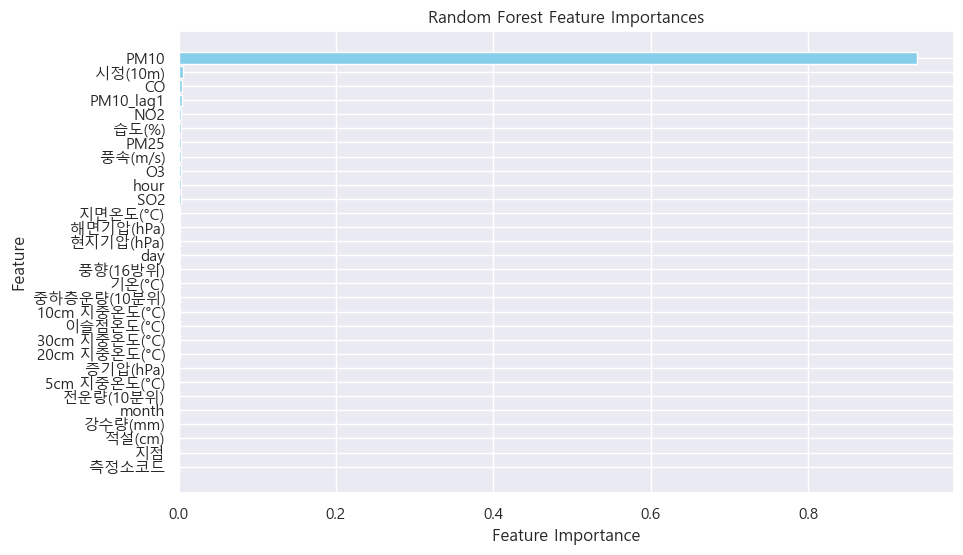

In [ ]:
temp_air_24 = pd.read_csv(path + 'air_2024.csv', encoding='cp949')
temp_weather_24 = pd.read_csv(path + 'weather_2024.csv', encoding='cp949')


temp_air_24['time'] = pd.to_datetime(temp_air_24['측정일시'] - 1, format='%Y%m%d%H', errors='coerce')
temp_weather_24['time'] = pd.to_datetime(temp_weather_24['일시'], errors='coerce')

# time 기준 병합 (inner join)
temp_df_24 = pd.merge(temp_air_24, temp_weather_24, on='time', how='inner')

# 문제 컬럼 제거
temp_drop_cols = [
    # 의미 X
    '측정소코드',
    
    # QC 플래그 컬럼
    '기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그', 
    '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그', 
    '일조 QC플래그', '일사 QC플래그', '지면온도 QC플래그',
    
    # 결측치 많음 (50% 이상)
    '3시간신적설(cm)', '운형(운형약어)', 
    '최저운고(100m )', '일조(hr)', '일사(MJ/m2)', '현상번호(국내식)',
    '지면상태(지면상태코드)',

    # 중복
    '측정일시', '일시',

    # 지역
    '지역', '망', '측정소명', '주소', '지점명'
]

temp_df_24 = temp_df_24.drop(columns=temp_drop_cols)

# 적설 및 강수량 null -> 0으로 변경
temp_df_24['적설(cm)'] = temp_df_24['적설(cm)'].fillna(0)
temp_df_24['강수량(mm)'] = temp_df_24['강수량(mm)'].fillna(0)

# 남은 컬럼에서 null값을 가진 index 모두 제거
temp_df_24 = temp_df_24.dropna()

# df_24, df_25의 time을  month, day, hour 로 쪼개기 (year는 필요 없음). 이후에 저장 시 index(time)은 포함하지 않음.
temp_df_24['month'] = temp_df_24['time'].dt.month
temp_df_24['day'] = temp_df_24['time'].dt.day
temp_df_24['hour'] = temp_df_24['time'].dt.hour

# df_24, df_25에 PM10_lag1 추가
temp_df_24['PM10_lag1'] = temp_df_24['PM10'].shift(24)

# df_24, df_25에 t+1 시점 변수(PM10_1) 추가
temp_df_24['PM10_1'] = temp_df_24['PM10'].shift(-1)

# 결측치 제거
temp_df_24 = temp_df_24.dropna(subset=['PM10', 'PM25', 'PM10_lag1', 'PM10_1']).reset_index(drop=True)

temp_path = './test/'

# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
temp_train_x = temp_df_24.drop(columns=['PM10_1', 'time'])
temp_train_y = temp_df_24['PM10_1']                        


# 랜덤포레스트로 모델 학습 진행하고 성능을 평가하여 출력해 보세요.
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # 트리 수
    random_state=42,
    n_jobs=-1
)

rf_model.fit(temp_train_x, temp_train_y)

# 학습된 rf_model 사용
importances = rf_model.feature_importances_

# 컬럼 이름과 함께 데이터프레임 생성
feature_importance_df = pd.DataFrame({
    'feature': temp_train_x.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# feature_importances 시각화
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# df_24, df_25에 사용할 변수들만 할당
# 제거할 변수 리스트
# 지역 관련: air와 weather 데이터 측정 장소가 달라서 예측에 의미 X 및 중요도 낮음
# 시간 관련: 측정일시, 일시 등은 이미 time 변수로 통일
# QC플래그: 데이터 품질 표시지만 대부분 결측치 많아 의미 X
# 운형, 지면상태 등: 결측치 많음
# 3시간신적설(cm), 지면온도 QC플래그: 결측치 많음
# 일사, 일조: 결측치 많음
# 현상번회: 결측치 많음

drop_cols = [
    '지역', '망', '측정소명', '주소', '지점명', '측정일시', '지점', '일시', '측정소코드',
    '기온 QC플래그', '강수량 QC플래그', '풍속 QC플래그', '풍향 QC플래그',
    '습도 QC플래그', '현지기압 QC플래그', '해면기압 QC플래그',
    '일조 QC플래그', '일사 QC플래그', '3시간신적설(cm)', '지면상태(지면상태코드)',
    '지면온도 QC플래그', '운형(운형약어)', '일조(hr)', '일사(MJ/m2)', '최저운고(100m )', 
    '현상번호(국내식)'
]
df_24 = df_24.drop(columns=drop_cols)
df_25 = df_25.drop(columns=drop_cols)

In [14]:
# time 변수를 기준으로 오름차순으로 정렬
df_24 = df_24.sort_values('time').reset_index(drop=True)
df_25 = df_25.sort_values('time').reset_index(drop=True)

#### **5) 변수들의 결측치 처리**

In [16]:
# df_24, df_25의 결측치 확인
print("df_24 결측치")
print(df_24.isna().sum())

print("\ndf_25 결측치")
print(df_25.isna().sum())

df_24 결측치
SO2               193
CO                100
O3                123
NO2               119
PM10              135
PM25              126
time                0
기온(°C)              0
강수량(mm)          7828
풍속(m/s)            31
풍향(16방위)           31
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
적설(cm)           8341
전운량(10분위)           0
중하층운량(10분위)         0
시정(10m)             0
지면온도(°C)            0
5cm 지중온도(°C)        0
10cm 지중온도(°C)       0
20cm 지중온도(°C)       0
30cm 지중온도(°C)       0
dtype: int64

df_25 결측치
SO2                25
CO                 25
O3                 25
NO2                25
PM10               27
PM25               32
time                0
기온(°C)              0
강수량(mm)          2673
풍속(m/s)             0
풍향(16방위)            0
습도(%)               0
증기압(hPa)            0
이슬점온도(°C)           0
현지기압(hPa)           0
해면기압(hPa)           0
적설(cm)           2569
전운량(10분위)           0
중하층운량(10분위)         

In [17]:
# df_24, df_25의 변수 중 결측치를 처리(결측치 처리 방법은 다양!)
# 선택해서 결측치를 처리해보세요.
# 적설(cm)과 강수량(mm) 결측치 0 처리
df_24['적설(cm)'] = df_24['적설(cm)'].fillna(0)
df_24['강수량(mm)'] = df_24['강수량(mm)'].fillna(0)
df_25['적설(cm)'] = df_25['적설(cm)'].fillna(0)
df_25['강수량(mm)'] = df_25['강수량(mm)'].fillna(0)

# 소량 결측치 보간 (앞뒤 평균)
small_na_cols = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '풍속(m/s)', '풍향(16방위)']
df_24[small_na_cols] = df_24[small_na_cols].interpolate(method='linear', limit_direction='both')
df_25[small_na_cols] = df_25[small_na_cols].interpolate(method='linear', limit_direction='both')

In [18]:
# df_24, df_25의 결측치 재확인 해보기
print("df_24 결측치")
print(df_24.isna().sum())

print("\ndf_25 결측치")
print(df_25.isna().sum())

df_24 결측치
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
time             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64

df_25 결측치
SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
time             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
dtype: int64


#### **6) 전일 같은 시간 미세먼지 농도 변수 추가**

* 먼저 df_24, df_25에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [19]:
# df_24, df_25의 time을  month, day, hour 로 쪼개기 (year는 필요 없음). 이후에 저장 시 index(time)은 포함하지 않음.

df_24['month'] = df_24['time'].dt.month
df_24['day'] = df_24['time'].dt.day
df_24['hour'] = df_24['time'].dt.hour

df_25['month'] = df_25['time'].dt.month
df_25['day'] = df_25['time'].dt.day
df_25['hour'] = df_25['time'].dt.hour

In [20]:
# 확인해보기
df_24.head()

,SO2,CO,O3,NO2,PM10,PM25,time,기온(°C),강수량(mm),풍속(m/s),...,중하층운량(10분위),시정(10m),지면온도(°C),5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C),month,day,hour
0,0.0031,1.21,0.0022,0.0425,29.0,23.0,2024-01-01 00:00:00,0.6,0.0,1.9,...,0,394,-0.2,-0.1,-0.2,0.0,1.0,1,1,0
1,0.0032,1.16,0.0020,0.0393,24.0,21.0,2024-01-01 01:00:00,0.5,0.0,2.2,...,0,402,-0.2,-0.1,-0.2,0.0,1.0,1,1,1
2,0.0030,1.00,0.0022,0.0359,23.0,19.0,2024-01-01 02:00:00,0.4,0.0,0.4,...,2,616,-0.3,-0.1,-0.2,0.0,1.0,1,1,2
3,0.0029,0.98,0.0021,0.0355,23.0,18.0,2024-01-01 03:00:00,-0.1,0.0,1.7,...,1,265,-0.3,-0.1,-0.2,0.0,1.0,1,1,3
4,0.0031,1.02,0.0020,0.0371,25.0,21.0,2024-01-01 04:00:00,-0.2,0.0,2.2,...,6,203,-0.3,-0.1,-0.2,0.0,1.0,1,1,4


In [21]:
# df_24, df_25에 전일 같은 시간 미세먼지 농도 변수(PM10_lag1) 추가
# 전일 같은 시간은 24시간 전 입니다. (shift 함수 활용)
# df_24에 PM10_lag1 추가
df_24['PM10_lag1'] = df_24['PM10'].shift(24)

# df_25에 PM10_lag1 추가
df_25['PM10_lag1'] = df_25['PM10'].shift(24)


In [22]:
# 확인해보기!
display(df_24[['time', 'PM10', 'PM10_lag1']].head(30))
display(df_25[['time', 'PM10', 'PM10_lag1']].head(30))

,time,PM10,PM10_lag1
0,2024-01-01 00:00:00,29.0,NaN
1,2024-01-01 01:00:00,24.0,NaN
2,2024-01-01 02:00:00,23.0,NaN
3,2024-01-01 03:00:00,23.0,NaN
4,2024-01-01 04:00:00,25.0,NaN
5,2024-01-01 05:00:00,26.0,NaN
6,2024-01-01 06:00:00,21.0,NaN
7,2024-01-01 07:00:00,19.0,NaN
8,2024-01-01 08:00:00,16.0,NaN
9,2024-01-01 09:00:00,18.0,NaN


,time,PM10,PM10_lag1
0,2025-01-01 00:00:00,23.0,NaN
1,2025-01-01 01:00:00,24.0,NaN
2,2025-01-01 02:00:00,23.0,NaN
3,2025-01-01 03:00:00,31.0,NaN
4,2025-01-01 04:00:00,31.0,NaN
5,2025-01-01 05:00:00,26.0,NaN
6,2025-01-01 06:00:00,27.0,NaN
7,2025-01-01 07:00:00,24.0,NaN
8,2025-01-01 08:00:00,21.0,NaN
9,2025-01-01 09:00:00,24.0,NaN


#### **7) t+1 시점의 미세먼지 농도 데이터 생성**
* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [23]:
# df_24, df_25에 t+1 시점 변수(PM10_1) 추가
# shift 함수 활용 해보기!
df_24['PM10_1'] = df_24['PM10'].shift(-1)
df_25['PM10_1'] = df_25['PM10'].shift(-1)

In [24]:
#확인해보기!
display(df_24[['time', 'PM10', 'PM10_1']].head(10))
display(df_25[['time', 'PM10', 'PM10_1']].head(10))

,time,PM10,PM10_1
0,2024-01-01 00:00:00,29.0,24.0
1,2024-01-01 01:00:00,24.0,23.0
2,2024-01-01 02:00:00,23.0,23.0
3,2024-01-01 03:00:00,23.0,25.0
4,2024-01-01 04:00:00,25.0,26.0
5,2024-01-01 05:00:00,26.0,21.0
6,2024-01-01 06:00:00,21.0,19.0
7,2024-01-01 07:00:00,19.0,16.0
8,2024-01-01 08:00:00,16.0,18.0
9,2024-01-01 09:00:00,18.0,21.0


,time,PM10,PM10_1
0,2025-01-01 00:00:00,23.0,24.0
1,2025-01-01 01:00:00,24.0,23.0
2,2025-01-01 02:00:00,23.0,31.0
3,2025-01-01 03:00:00,31.0,31.0
4,2025-01-01 04:00:00,31.0,26.0
5,2025-01-01 05:00:00,26.0,27.0
6,2025-01-01 06:00:00,27.0,24.0
7,2025-01-01 07:00:00,24.0,21.0
8,2025-01-01 08:00:00,21.0,24.0
9,2025-01-01 09:00:00,24.0,26.0


In [27]:
# 결측치가 있다면 처리하고 확인해보기!
df_24 = df_24.dropna(subset=['PM10', 'PM25', 'PM10_lag1', 'PM10_1']).reset_index(drop=True)
df_25 = df_25.dropna(subset=['PM10', 'PM25', 'PM10_lag1', 'PM10_1']).reset_index(drop=True)

# 확인
print(df_24.isna().sum(), end='\n\n')
print(df_25.isna().sum())

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
time             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     0
10cm 지중온도(°C)    0
20cm 지중온도(°C)    0
30cm 지중온도(°C)    0
month            0
day              0
hour             0
PM10_lag1        0
PM10_1           0
dtype: int64

SO2              0
CO               0
O3               0
NO2              0
PM10             0
PM25             0
time             0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
풍향(16방위)         0
습도(%)            0
증기압(hPa)         0
이슬점온도(°C)        0
현지기압(hPa)        0
해면기압(hPa)        0
적설(cm)           0
전운량(10분위)        0
중하층운량(10분위)      0
시정(10m)          0
지면온도(°C)         0
5cm 지중온도(°C)     

In [28]:
df_24.shape

(8759, 30)

### (2) train, test 데이터 분리 및 저장

* 24년도 데이터(df_24)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 25년도 데이터(df_25)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* train_x, test_x 에서 'time' 변수 (또는 인덱스)는 제외헤주세요
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)


In [29]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
train_x = df_24.drop(columns=['PM10_1', 'time'])
train_y = df_24['PM10_1']                        

test_x = df_25.drop(columns=['PM10_1', 'time'])
test_y = df_25['PM10_1']

★ csv 파일이 잘 생성되었는지 확인하세요. 혹시 모르니 저장해두는 것을 추천드립니다. ★

In [30]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
train_x.to_csv('train_x.csv', index=False, encoding='utf-8-sig')
train_y.to_csv('train_y.csv', index=False, encoding='utf-8-sig')
test_x.to_csv('test_x.csv', index=False, encoding='utf-8-sig')
test_y.to_csv('test_y.csv', index=False, encoding='utf-8-sig')

# 고생하셨습니다👍👍